# 수정사항
* 계산식을 코드로 바로 입력
* Nan data table 수정
* 추가데이터와 비교 (ex. 3월, 12월 \
             코로나 확진자 증가, 거리두기 단계 변화와 비교 )
* plot -> pointplot 로 변경
* heatmap(corr)
    *시간 -> 지역
    *요일 -> 월~일
    ----------------------------------
*ppt 제작
*

- 주제 선정 동기, 개요, 목적등
 * 대중교통이 감소하였고, 그럼 일반 자동차 통행량이 증가하였을까?
    

- 데이터 수집 방법

- 데이터 처리 및 분석

    - 분석 방법 : 빈도분석, 기술통계분석, 상관계수분석.

    가설 1
    데이터 설명 및 인사이트 도출 과정 (아주 간단히) 및 시각화
    결론 1

    가설 2
    데이터 설명 및 인사이트 도출 과정 (아주 간단히) 및 시각화
    결론 2

    …

- 추후 개선 및 느낀점

In [2]:
pwd

'/Users/ijiyeong/Downloads'

In [3]:
%cd

/Users/ijiyeong


In [4]:
%cd seoultraffic/

/Users/ijiyeong/seoultraffic


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
import seaborn as sns
import matplotlib.font_manager as fm
import missingno as msno #결측데이터 검색
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [6]:
# 폰트설정
from matplotlib import font_manager
plt.rcParams["font.family"] = 'NanumGothicCoding'
from matplotlib import rc
rc('font', family="Arial Unicode MS")

In [7]:
### 2019 pub_transpor data road
df1 = pd.read_csv("2019.csv")
### 2020 pub_transpor data road
df2 = pd.read_csv("2020.csv")
### 2019 Traffic data road
#df_2019_url = './data_2019_seoultraffic.csv'
### 2019 Traffic data road
#df_2020_url = './data_2020_seoultraffic.csv'

In [210]:
ddf1 = pd.read_csv("data_2019_seoultraffic.csv")
ddf2 = pd.read_csv("data_2020_seoultraffic.csv")

### Pub_transpor data 2019

In [408]:
all_traffic_m_2019 = ddf1.pivot_table("total", "month")
all_traffic_m_2019.tail(2)

,total
month,
11,72354.783704
12,71778.392115


In [212]:
all_traffic_m_2019.loc[:, "total"] = all_traffic_m_2019.sum(axis=1)
all_traffic_m_2019.tail(2)

,total
month,
11,72354.783704
12,71778.392115


In [400]:
all_traffic_m_2020 = ddf2.pivot_table("total", "month")
all_traffic_m_2020.tail(2)

,total
month,
11,65578.097531
12,59918.407885


In [214]:
all_traffic_m_2020.loc[:, "tatal"] = all_traffic_m_2020.sum(axis=1)
all_traffic_m_2020.tail(2)

,total,tatal
month,,
11,65578.097531,65578.097531
12,59918.407885,59918.407885


### Pub_transpor data 2020

In [215]:
all_traffic_m_2019 = ddf1.pivot_table("total", "month", aggfunc=np.sum)
all_traffic_m_2019.tail(2)

,total
month,
11,293036874
12,300392571


In [216]:
all_traffic_m_2020 = ddf2.pivot_table("total", "month", aggfunc=np.sum)
all_traffic_m_2020.tail(2)

,total
month,
11,265591295
12,250758537


In [217]:
all_traffic_r_2019 = ddf2.pivot_table("total", "구", aggfunc=np.sum)
all_traffic_r_2019.tail(2)

,total
구,
영등포구,226580316
중구,137745441


In [218]:
all_traffic_r_2020 = ddf2.pivot_table("total", "구", aggfunc=np.sum)
all_traffic_r_2020.tail(2)

,total
구,
영등포구,226580316
중구,137745441


## 1-1 2019_2020 서울 전체 대중교통량 비교

In [220]:
y1 = all_traffic_m_2019["total"].sum()
y2 = all_traffic_m_2020["total"].sum()
all_rate_2019 = round(((y2 - y1) / y1 * 100), 2) # 감소량
all_rate_2019

-5.52

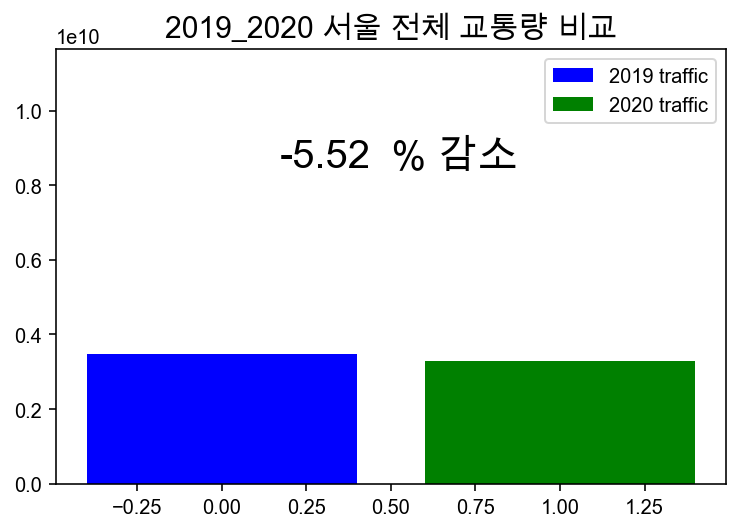

In [223]:
x1 = 0
x2 = 1
#y1 = all_traffic_m_2019["total"].sum() #2019 Total 교통량
#y2 = all_traffic_m_2020["total"].sum() #2020 Total 교통량
y1 = all_traffic_m_2019["total"].sum()
y2 = all_traffic_m_2020["total"].sum()

plt.bar(x1,y1, label='2019 traffic', color='b')
plt.bar(x2,y2, label='2020 traffic', color='g')
plt.legend()
plt.ylim([0,70*1000000000/6])
plt.text(0.17,85*100000000,all_rate_2019,fontsize=20)
plt.text(0.5,85*100000000,"% 감소",fontsize=20)
plt.title("2019_2020 서울 전체 교통량 비교", fontsize = 15)

plt.show()

## 1-2 2019_2020 서울 전체 차량 통행량 비교

# 2-1 2019-2020 월별 서울 교통량 비교

In [224]:
all_tans_2019 = round(all_traffic_m_2019["total"].mean())
print("2019년 평균 통행량 :", all_tans_2019,"대")

2019년 평균 통행량 : 289316634 대


In [226]:
compare_2019 = all_traffic_m_2019[all_traffic_m_2019["total"] > all_traffic_m_2019["total"].mean()]
compare_df_2019 = pd.DataFrame(compare_df_2019, columns=["total"])
compare_df_2019

,total
월,
2019-03,695974373
2019-04,699471154
2019-05,719349046
2019-07,695624147
2019-10,711970874
2019-11,690195489
2019-12,697837963


In [228]:
all_tans_2020 = round(all_traffic_m_2020["total"].mean())
print("2020년 평균 통행량 :", all_tans_2020,"대")

2020년 평균 통행량 : 273360274 대


In [232]:
compare_2020 = all_traffic_m_2020[all_traffic_m_2020["total"] > all_traffic_m_2020["total"].mean()]
compare_df_2020 = pd.DataFrame(compare_2020, columns=["total"])
compare_df_2020

,total
month,
1,287338914
3,276988930
4,275890542
5,291438374
6,284005714
7,292195000


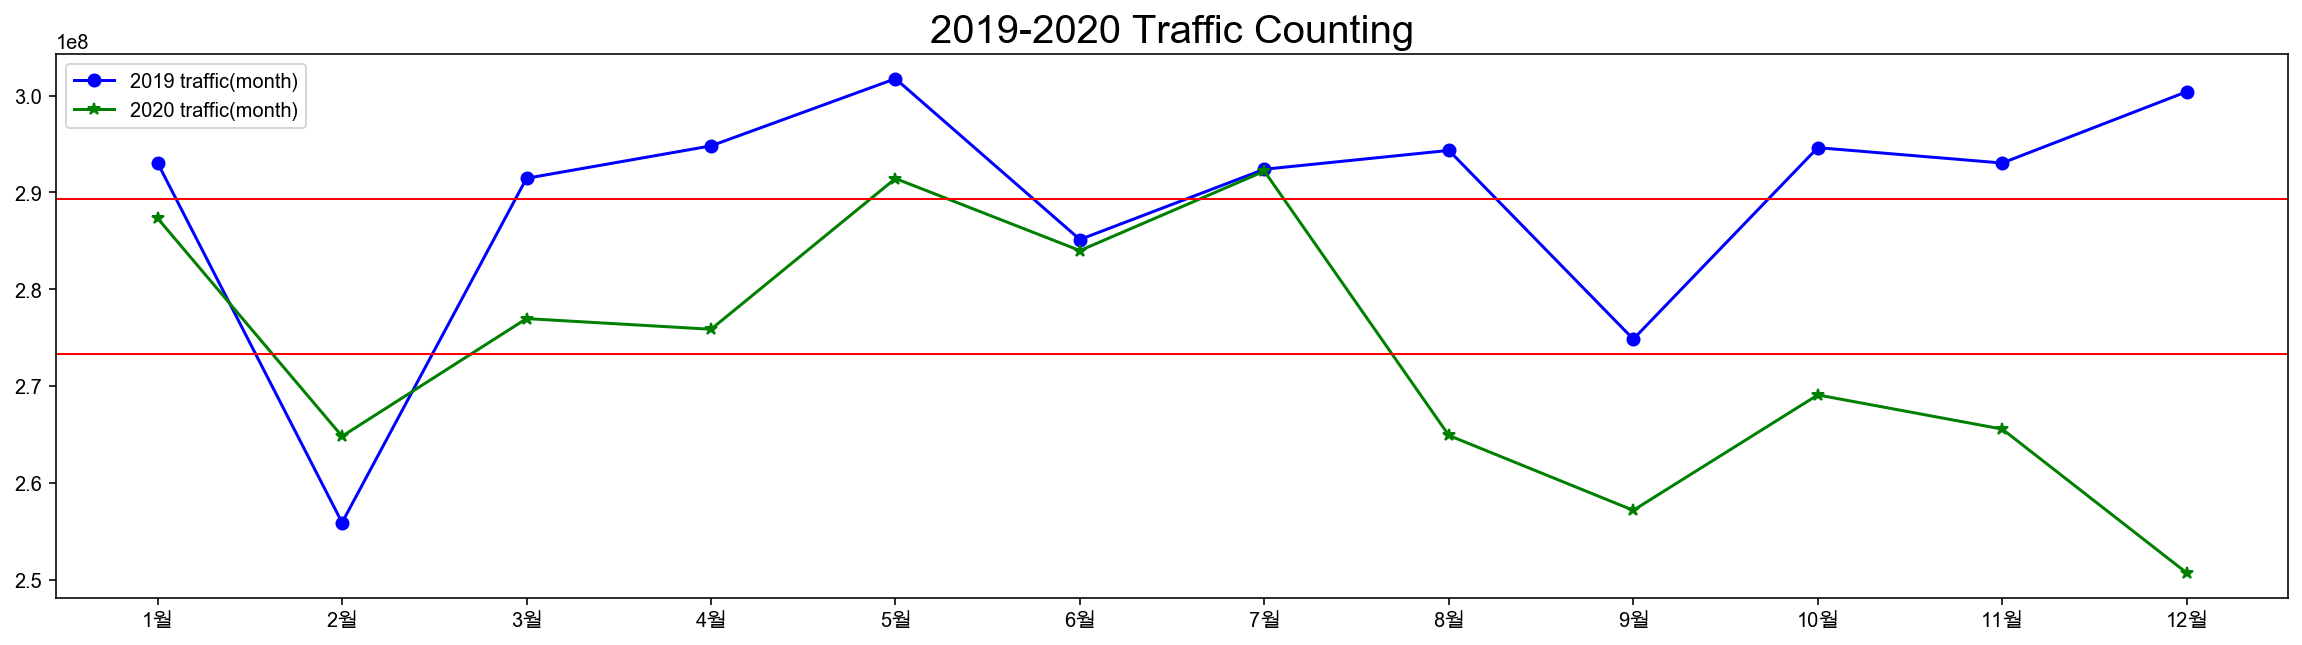

In [264]:
X = ["1월","2월","3월","4월","5월","6월","7월","8월","9월","10월","11월","12월"]
y1 = all_traffic_m_2019.total
y2 = all_traffic_m_2020.total

plt.figure(figsize=(20, 5))
plt.plot(X,y1, label='2019 traffic(month)', color='b', marker='o')
plt.plot(X,y2, label='2020 traffic(month)', color='g', marker='*')

plt.legend()
plt.title("2019-2020 Traffic Counting", fontsize=20)
plt.axhline(y=all_tans_2019, color='r', linewidth=1)
plt.axhline(y=all_tans_2020, color='r', linewidth=1)

plt.show()

# 2-2 2019-2020 월별 차량 통행량 비교

## 3-0. 요일별 대중 교통량 출력

In [280]:
df3 = pd.read_csv("2019.csv")
day_pub_traffic_2019 = df3.drop(columns=["시간", "지명", "발생량", "도착량", "월"])
day_pub_traffic_2019

,날짜,count
0,2019-01-01(화),3869
1,2019-01-01(화),3393
2,2019-01-01(화),1571
3,2019-01-01(화),4798
4,2019-01-01(화),3785
...,...,...
218995,2019-12-31(화),11500
218996,2019-12-31(화),17901
218997,2019-12-31(화),26981
218998,2019-12-31(화),29817


In [281]:
data, weeks = [], ["월", "화", "수", "목", "금", "토", "일"]
for week in weeks:
    data.append(day_pub_traffic_2019[day_pub_traffic_2019["날짜"].str.contains(week)]["count"].sum())

In [282]:
day_pub_traffic_2019 = pd.DataFrame(data=data, index=weeks).reset_index()
day_pub_traffic_2019.columns = ["요일", "count"]
day_pub_traffic_2019

,요일,count
0,월,1248519518
1,화,1295266170
2,수,1271578659
3,목,1261426762
4,금,1317295673
5,토,989868437
6,일,732363190


In [283]:
df4 = pd.read_csv("2020.csv")
day_pub_traffic_2020 = df4.drop(columns=["시간", "지명", "발생량", "도착량", "월"])
day_pub_traffic_2020

,날짜,count
0,2020-01-01(수),2873
1,2020-01-01(수),3251
2,2020-01-01(수),1877
3,2020-01-01(수),3677
4,2020-01-01(수),3077
...,...,...
219595,2020-12-31(목),2483
219596,2020-12-31(목),2779
219597,2020-12-31(목),3203
219598,2020-12-31(목),3305


In [284]:
data, weeks = [], ["월", "화", "수", "목", "금", "토", "일"]
for week in weeks:
    data.append(day_pub_traffic_2020[day_pub_traffic_2020["날짜"].str.contains(week)]["count"].sum())

In [285]:
day_pub_traffic_2020 = pd.DataFrame(data=data, index=weeks).reset_index()
day_pub_traffic_2020.columns = ["요일", "count"]
day_pub_traffic_2020

,요일,count
0,월,958279301
1,화,978872517
2,수,986414298
3,목,989556461
4,금,974119077
5,토,649499462
6,일,463975271


# 3 요일별 대중교통 이용량 비교

### 3.1.1주말 대중교통 이용량 비교(토,일)

In [358]:
ddf3 = pd.read_csv("./data_2019_seoultraffic.csv")
day_all_traffic_2019 = pd.DataFrame(ddf3, columns=["요일", "total"])
day_all_traffic_2019

,요일,total
0,일,42083
1,수,63520
2,목,68255
3,금,69836
4,토,59502
...,...,...
49270,금,114585
49271,토,123559
49272,일,113614
49273,월,110342


In [359]:
data, weeks = [], ["월", "화", "수", "목", "금", "토", "일"]
for week in weeks:
    data.append(day_all_traffic_2019[day_all_traffic_2019["요일"].str.contains(week)]["total"].sum())

In [360]:
day_all_traffic_2019 = pd.DataFrame(data=data, index=weeks).reset_index()
day_all_traffic_2019.columns = ["요일", "total"]
day_all_traffic_2019

,요일,total
0,월,495321251
1,화,509517933
2,수,527079819
3,목,492164038
4,금,521941567
5,토,492424776
6,일,433350226


In [361]:
ddf4 = pd.read_csv("./data_2020_seoultraffic.csv")
day_all_traffic_2020 = pd.DataFrame(ddf4, columns=["요일", "total"])
day_all_traffic_2020

,요일,total
0,수,43040
1,목,62488
2,금,67088
3,토,54995
4,일,46687
...,...,...
49405,일,95643
49406,월,96370
49407,화,96541
49408,수,97701


In [362]:
data, weeks = [], ["월", "화", "수", "목", "금", "토", "일"]
for week in weeks:
    data.append(day_all_traffic_2020[day_all_traffic_2020["요일"].str.contains(week)]["total"].sum())

In [363]:
day_all_traffic_2020 = pd.DataFrame(data=data, index=weeks).reset_index()
day_all_traffic_2020.columns = ["요일", "total"]
day_all_traffic_2020

,요일,total
0,월,475181608
1,화,486640237
2,수,493765368
3,목,498696678
4,금,495326562
5,토,454937964
6,일,375774867


### 3.1.2 주말 차량 통행량 비교(토,일)

In [112]:
(np.sum(ytraffic_2020["count"][-2:]) - np.sum(ytraffic_2019["count"][-2:]))\
/ np.sum(ytraffic_2019["count"][-2:]) * 100

-35.34698146615792

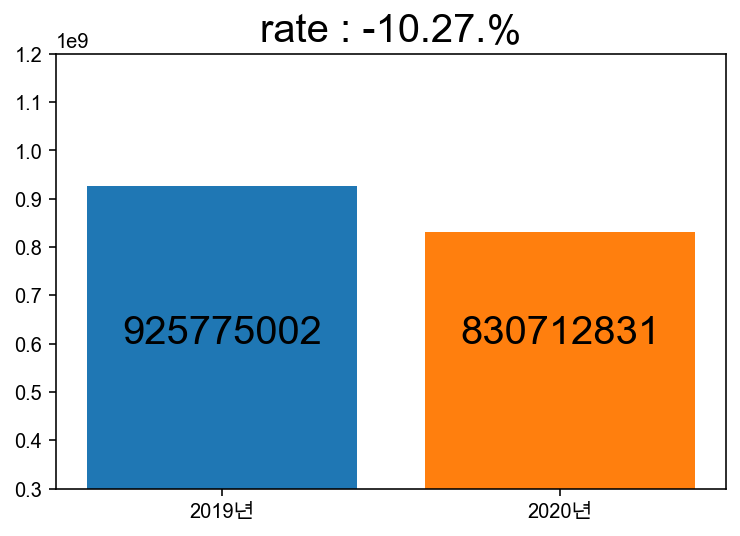

In [113]:
X1 = ["2019년"]
X2 = ["2020년"]

y1 = week_2019
y2 = week_2020

plt.bar(X1, y1)
plt.bar(X2, y2)
plt.ylim([300000000, 120*10000000]) 

plt.text(X1, 60*10000000, week_2019, ha="center", fontsize = 20)
plt.text(X2, 60*10000000, week_2020, ha="center" ,fontsize = 20)
plt.title("rate : -10.27.%", fontsize = 20)
plt.show()


plt.show()

### 3.2.1 평일 대중교통 이용량 비교(월-금)

In [114]:
(np.sum(ytraffic_2020["count"][:-2]) - np.sum(ytraffic_2019["count"][:-2]))\
/ np.sum(ytraffic_2019["count"][:-2]) * 100

-23.56622891390716

In [115]:
y1 = sum(ytraffic_2019["count"][:-2])
y2 = sum(ytraffic_2020["count"][:-2])
y1, y2

(6394086782, 4887241654)

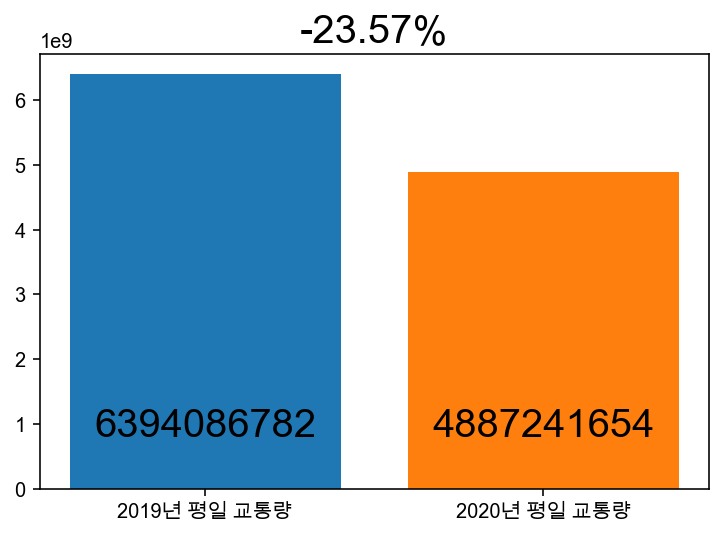

In [116]:
plt.bar("2019년 평일 교통량", y1)
plt.bar("2020년 평일 교통량", y2)

a = np.sum(ytraffic_2019["count"][:-2])
b = np.sum(ytraffic_2020["count"][:-2])
plt.text("2019년 평일 교통량",80*10000000, a, ha="center", fontsize = 20)
plt.text("2020년 평일 교통량", 80*10000000, b, ha="center", fontsize = 20)
plt.title("-23.57%", fontsize = 20)
plt.show()

### 3.2.2 평일 차량통행량 비교(월-금)

In [117]:
dayofthweek_2020

year,2020
요일,
금,495326562
목,498696678
수,493765368
월,475181608
일,375774867
토,454937964
화,486640237


In [118]:
yy1 = (np.sum(dayofthweek_2019[0:4])+np.sum(dayofthweek_2019[-1:])).values
yy2 = (np.sum(dayofthweek_2020[0:4])+np.sum(dayofthweek_2020[-1:])).values

In [119]:
cc = ((yy2 - yy1) / yy2 ) * 100

/Users/ijiyeong/opt/anaconda3/envs/jiyoung/lib/python3.7/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


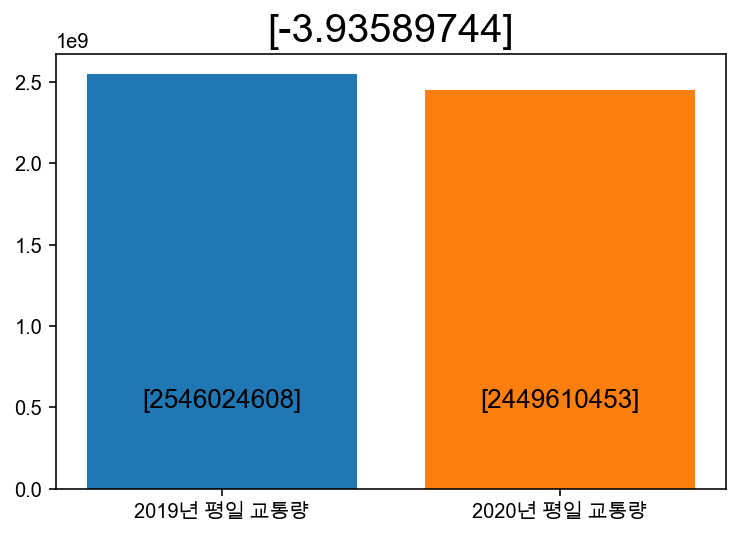

In [120]:
plt.bar("2019년 평일 교통량", yy1)
plt.bar("2020년 평일 교통량", yy2)

yy1 = (np.sum(dayofthweek_2019[0:4])+np.sum(dayofthweek_2019[-1:])).values
yy2 = (np.sum(dayofthweek_2020[0:4])+np.sum(dayofthweek_2020[-1:])).values
plt.text("2019년 평일 교통량", 50*10000000, yy1, ha="center", fontsize = 13)
plt.text("2020년 평일 교통량", 50*10000000, yy2, ha="center", fontsize = 13)
plt.title(cc, fontsize = 20)
plt.show()

## 4.지역별 비교

### 4.1지역별 대중교통량 비교

In [121]:
traffic_r_2019.loc[:,'region'] = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', \
                                  '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', \
                                 '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구' ]

traffic_r_2019.tail(2)

시간,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,total,region
지명,,,,,,,,,,,,,,,,,,,,,
중구,3518016,572340,239087,215153,501450,3155734,5716093,12502745,25150575,18739397,...,29865336,37557276,55470515,38990793,27587356,25132393,21287791,12756123,447485581,중구
중랑구,1429246,237634,75320,66496,865449,3163495,6457136,15182553,22283249,13902473,...,11444769,12500258,14244402,12439521,8442147,7587105,6741702,3980054,199074236,중랑구


In [122]:
traffic_r_2019['total'].mean()

324652736.36

In [123]:
traffic_r_2019_a = round(traffic_r_2019['total'].mean())
print("2019년 평균 통행량 :", traffic_r_2019_a,"대")

2019년 평균 통행량 : 324652736 대


In [124]:
aa = traffic_r_2019[traffic_r_2019 > traffic_r_2019.mean()]
aaa = pd.DataFrame(aa, columns=["total"])
aaa.drop()

aaa

/Users/ijiyeong/opt/anaconda3/envs/jiyoung/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [125]:
traffic_r_2020.loc[:,'region'] = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', \
                                   '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', \
                                 '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구' ]

traffic_r_2020.tail(2)

시간,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,total,region
지명,,,,,,,,,,,,,,,,,,,,,
중구,1030686,267406,125901,144638,524518,2845992,6134273,15971819,33999864,20472449,...,17012446,23538009,33093127,18656846,13260295,11477169,8628758,4649330,295154710,중구
중랑구,999460,179205,71499,63145,722886,2550547,4890796,10808463,14961209,8788647,...,8997200,10484633,13326202,11698006,7464722,6621289,5495151,3253670,153829883,중랑구


In [126]:
traffic_r_2020['total'].mean()

240028655.48

In [127]:
traffic_r_2020_a = round(traffic_r_2020['total'].mean())
print("2020년 평균 통행량 :", traffic_r_2020_a,"대")

2020년 평균 통행량 : 240028655 대


In [126]:
traffic_m_2019.tail()

시간,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,total
월,,,,,,,,,,,,,,,,,,,,,
2019-08,5105209,688939,245753,186918,1536615,7387880,15982873,36095360,56208713,39227569,...,35924552,40757424,47953701,63356494,48285379,34428917,32232130,30252107,17682593,669297037
2019-09,4453210,623343,221117,169140,1431441,6804565,15271208,37232347,57404562,39297270,...,35155529,40515768,46359714,59053287,44447950,31479458,29519715,27297536,15584100,643258619
2019-10,4738982,652732,238243,188198,1616618,7789686,17013259,40865961,64728349,44640977,...,38958128,44530852,51164639,65020305,47833042,34125960,32135625,29594112,16824050,711970874
2019-11,4673046,632269,226815,178204,1545112,7373998,16015572,38847628,63980335,44391584,...,37621012,43101411,50394656,63666940,46147509,32524277,30650650,28400139,16392559,690195489
2019-12,5374999,894129,284658,205711,1508785,7102122,15312007,36548547,61293678,42821402,...,39572005,44295328,51354740,63240031,45627653,32970482,31787814,29838776,17951621,697837963


In [127]:
traffic_r_2019.tail()

시간,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,total
지명,,,,,,,,,,,,,,,,,,,,,
용산구,1735436,151494,49239,49862,247247,2144038,4951238,10798631,18900867,14160427,...,14602340,17075819,19903425,26063606,18956573,13831884,13362461,11825542,7015315,255899795
은평구,1809192,281034,92770,36578,955092,3605830,8885965,21584794,30165645,19608069,...,14286650,16408235,17298493,19033814,15867615,11346273,10397447,9601781,5713871,275144775
종로구,3555000,781287,300532,255086,690467,3010389,5163036,11067737,20130104,16255880,...,27788412,30934635,35694359,45903551,31696066,22481335,22577091,20628682,11537063,410146010
중구,3518016,572340,239087,215153,501450,3155734,5716093,12502745,25150575,18739397,...,26960738,29865336,37557276,55470515,38990793,27587356,25132393,21287791,12756123,447485581
중랑구,1429246,237634,75320,66496,865449,3163495,6457136,15182553,22283249,13902473,...,10034266,11444769,12500258,14244402,12439521,8442147,7587105,6741702,3980054,199074236


In [128]:
dfdf_2019 = traffic_m_2019[traffic_m_2019["total"] > traffic_m_2019["total"].mean()]
dfdfdf_2019 = pd.DataFrame(dfdf_2019, columns=["total"])
dfdfdf_2019

,total
월,
2019-03,695974373
2019-04,699471154
2019-05,719349046
2019-07,695624147
2019-10,711970874
2019-11,690195489
2019-12,697837963


In [129]:
bb = traffic_r_2020[traffic_r_2020["total"] > traffic_r_2020["total"].mean()]
bbb = pd.DataFrame(bb, columns=["total"])
bbb

,total
지명,
강남구,567110115
강서구,260342153
관악구,289329188
구로구,283206229
마포구,290281580
서초구,368079647
송파구,351362444
영등포구,311535742
종로구,280859306


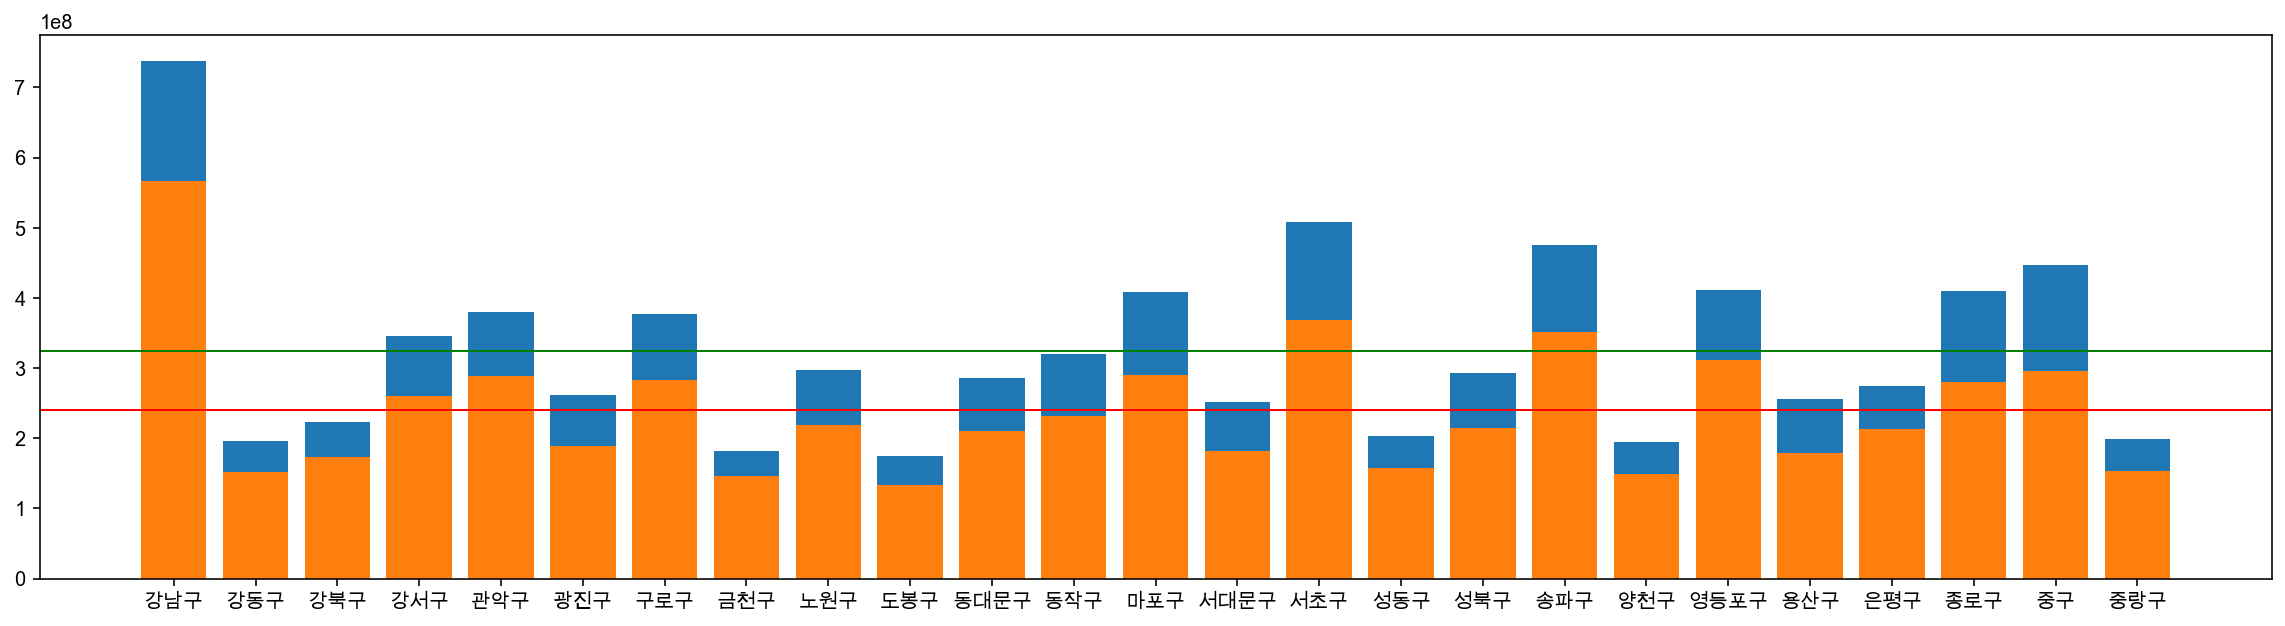

In [129]:
plt.figure(figsize=(20, 5))

X = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', \
    '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', \
    '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구' ]

plt.bar(X, traffic_r_2019["total"])
plt.bar(X, traffic_r_2020["total"])


#plt.bar(traffic_r_2019["region"], traffic_r_2019["total"])
#plt.bar(traffic_r_2020["region"], traffic_r_2020["total"])
#plt.legend()
plt.axhline(y=traffic_r_2019['total'].mean(), color='g', linewidth=1) #label="2019")
plt.axhline(y=traffic_r_2020['total'].mean(), color='r', linewidth=1) #label="2020")


plt.show()

In [130]:
#4.2 지역별 차량 교통량 비교

In [131]:
ddf_2019 = traffic_2019

In [132]:
ddf_2019 = ddf_2019.pivot_table("총합","구",aggfunc=np.sum)
ddf_2019 = ddf_2019.reset_index()
ddf_2019.tail()

,구,총합
27,금천구,27050329
28,동대문구,51638629
29,서대문구,90434112
30,영등포구,258662532
31,중구,164525130


In [133]:
gein_tans_2019 = round(ddf_2019["총합"].mean())
print("2019년 평균 통행량 :", gein_tans_2019,"대")

2019년 평균 통행량 : 108493738 대


In [134]:
traffic_r_2020_a = round(traffic_r_2020['total'].mean())
print("2020년 평균 통행량 :", traffic_r_2020_a,"대")

2020년 평균 통행량 : 240028655 대


In [135]:
ddff_2019 = ddf_2019[ddf_2019["총합"] > ddf_2019["총합"].mean()]
ddff_2019

,구,총합
0,강남구,324045199
2,강서구,128036025
11,노원구,130213251
13,동작구,114474299
14,마포구,223305329
16,서초구,341425467
17,성동구,135300187
18,성북구,141905753
19,송파구,184148545
20,양천구,121845149


In [136]:
ddf_2020 = traffic_2020

In [137]:
ddf_2020 = ddf_2020.pivot_table("총합","구",aggfunc=np.sum)
ddf_2020 = ddf_2020.reset_index()
ddf_2020.tail()

,구,총합
27,금천구,28356169
28,동대문구,49919679
29,서대문구,72687504
30,영등포구,226580316
31,중구,137745441


In [138]:
gein_tans_2020 = round(ddf_2020["총합"].mean())
print("2020년 평균 통행량 :", gein_tans_2020,"대")

2020년 평균 통행량 : 102510103 대


In [139]:
ddff_2020 = ddf_2020[ddf_2020["총합"] > ddf_2020["총합"].mean()]
ddff_2020

,구,총합
0,강남구,294592122
2,강서구,128733424
11,노원구,124490761
13,동작구,109572681
14,마포구,220787222
16,서초구,322516550
17,성동구,143301660
18,성북구,133427860
19,송파구,166771016
20,양천구,115724129


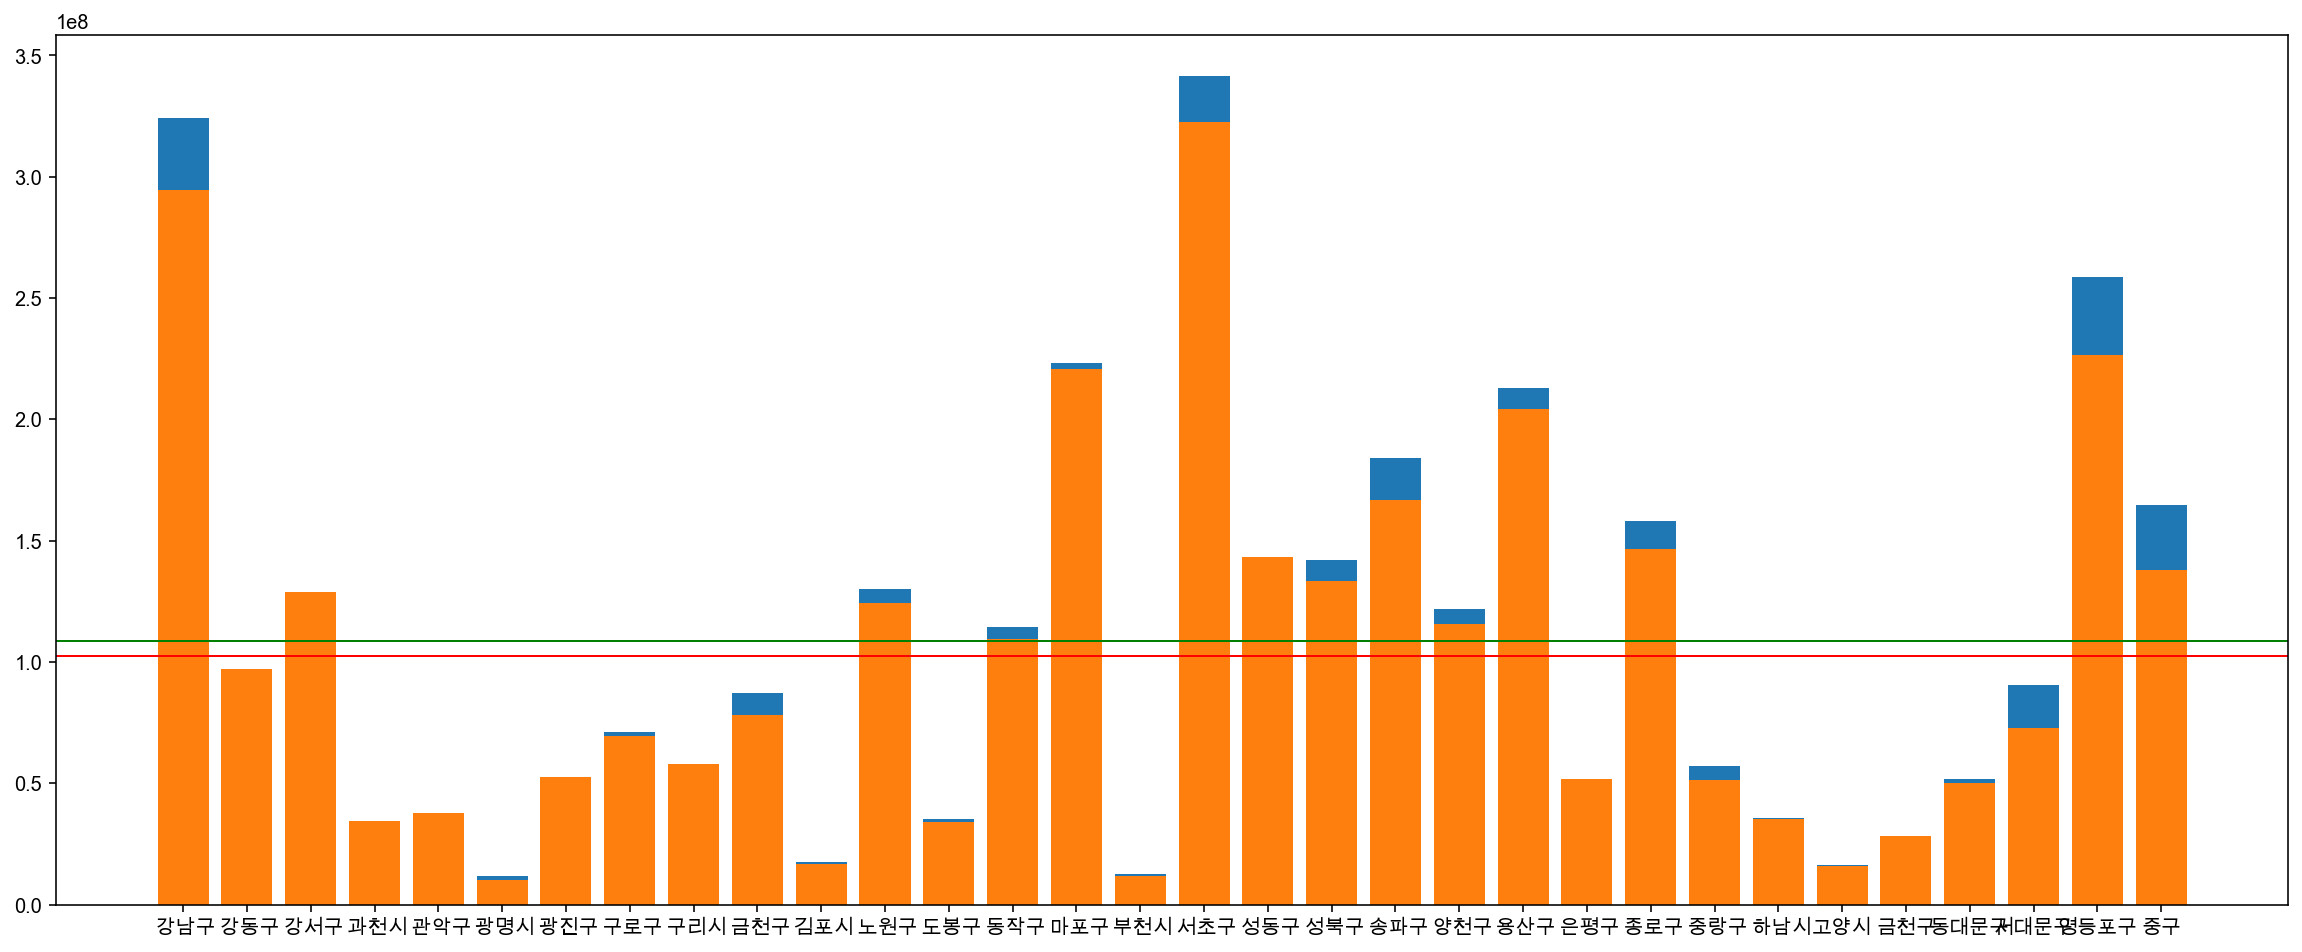

In [140]:
plt.figure(figsize=(20, 8))
plt.bar(ddf_2019["구"], ddf_2019["총합"])
plt.bar(ddf_2020["구"], ddf_2020["총합"])

#plt.legend()
plt.axhline(y=gein_tans_2019, color='g', linewidth=1) #label="2019")
plt.axhline(y=gein_tans_2020, color='r', linewidth=1) #label="2020")


plt.show()


/Users/ijiyeong/opt/anaconda3/envs/jiyoung/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ijiyeong/opt/anaconda3/envs/jiyoung/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


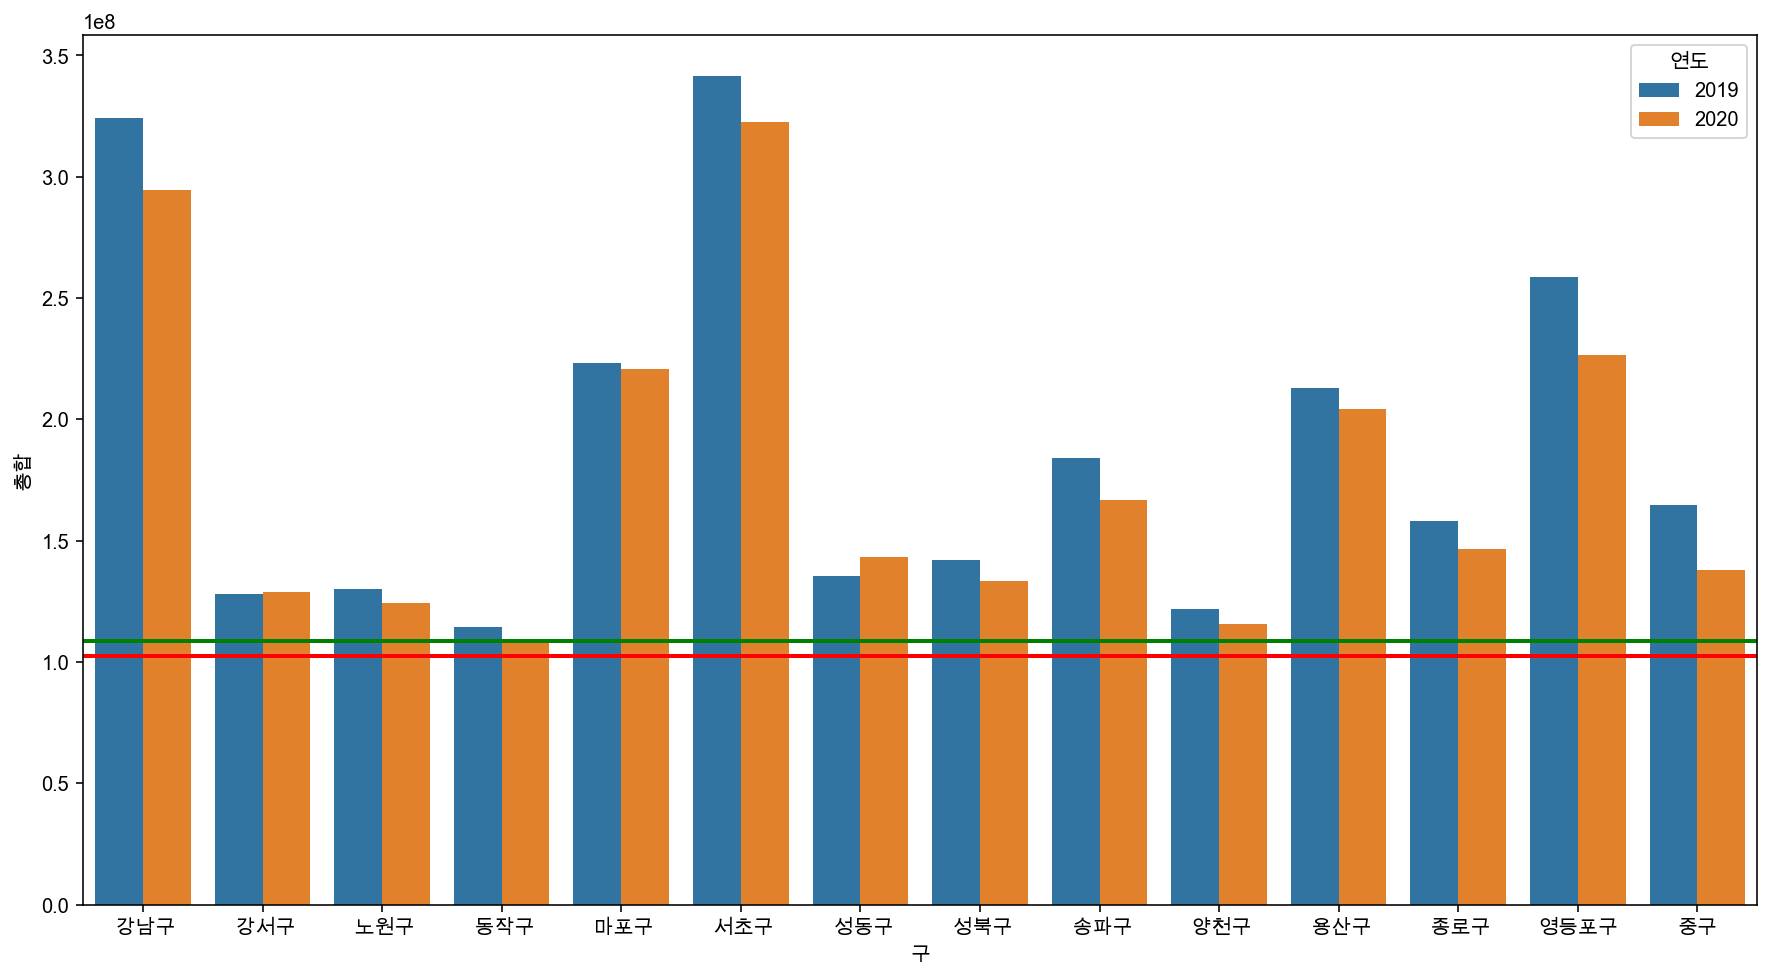

In [141]:
import seaborn as sns

ddff_2019["연도"] = 2019
ddff_2020["연도"] = 2020
dddfff = pd.concat([ddff_2019, ddff_2020])

x = dddfff["구"]
y = dddfff["총합"]

plt.figure(figsize =(15, 8))
sns.barplot(x=x, y=y, hue=dddfff["연도"])
plt.axhline(y=gein_tans_2019, color='g', linewidth=2) #label="2019"
plt.axhline(y=gein_tans_2020, color='r', linewidth=2) #label="2020"